In [1]:
from google.colab import drive
drive.mount("/content/drive")
!cp -r /content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/.creds/.aws ~/.aws
!pip install -qq sagemaker

Mounted at /content/drive


In [ ]:
from sagemaker.s3 import S3Downloader
S3Downloader.download("s3://third-umpire-decision-automation-osura/datasets/augmented/batsmen-semantic-segmentation/labels","./seg-ds/labels")

In [5]:
# @title Functions

from typing import Union, Tuple
import numpy as np
def cvtAnnotationsTXT2LST(txt_cntnt):
    if txt_cntnt.strip() != "":
        lst = list(
            map(
                lambda line: [
                    int(line.split()[0]),
                    *list(map(float, line.split()[1:])),
                ],
                txt_cntnt.strip().split("\n"),
            )
        )
        return lst
    else:
        return []


def cvtAnnotationsLST2TXT(lst_cntnt, round_deci=None):
    if round_deci is not None:
        strn = "\n".join(
            list(
                map(
                    lambda box: " ".join(
                        [
                            str(int(box[0])),
                            *list(
                                map(
                                    lambda num: str(np.round(num, round_deci)).ljust(
                                        8, "0"
                                    ),
                                    box[1:],
                                )
                            ),
                        ]
                    ),
                    lst_cntnt,
                )
            )
        )
    else:
        strn = "\n".join(
            list(
                map(
                    lambda box: " ".join([str(int(box[0])), *list(map(str, box[1:]))]),
                    lst_cntnt,
                )
            )
        )
    return strn


def readAnnotationsFile(
    file_path: str, tolist: bool = True
) -> Union[str, Tuple[Tuple]]:
    txt_cntnt = ""
    with open(file_path) as handler:
        txt_cntnt = handler.read()
    output = txt_cntnt
    if tolist:
        output = cvtAnnotationsTXT2LST(txt_cntnt)

    return output

def saveAnnotationsFile(
    cntnt: Union[str, Tuple[Tuple]], file_path: str, round_deci=None
) -> None:
    if type(cntnt) != str:
        cntnt = cvtAnnotationsLST2TXT(cntnt, round_deci)
    with open(file_path, "w") as handler:
        handler.write(cntnt)


In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
images_path = "/content/seg-ds/images"
labels_path = "/content/seg-ds/labels"
img_nms = os.listdir(f"{images_path}/train")

3

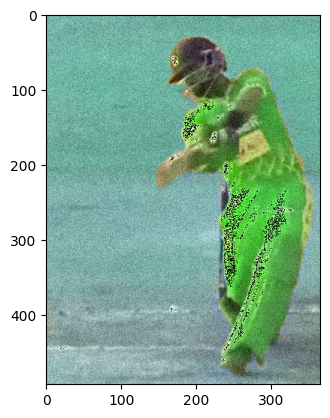

In [15]:
id = 14
nm = os.path.splitext(img_nms[id])[0]
img_path = f"{images_path}/train/{nm}.png"
lbl_path = f"{labels_path}/train/{nm}.txt"

img = cv.imread(img_path)
plt.imshow(img)
txt = readAnnotationsFile(lbl_path)
len(txt)

In [20]:

print(txt_filt)

[[0, 0.5382513661202186, 0.058823529411764705, 0.5355191256830601, 0.06085192697768764, 0.5191256830601093, 0.06085192697768764, 0.5163934426229508, 0.06288032454361055, 0.5027322404371585, 0.06288032454361055, 0.5, 0.06490872210953347, 0.4972677595628415, 0.06490872210953347, 0.49453551912568305, 0.06693711967545639, 0.4918032786885246, 0.06693711967545639, 0.4890710382513661, 0.06896551724137931, 0.48633879781420775, 0.06896551724137931, 0.48360655737704916, 0.07099391480730223, 0.48360655737704916, 0.07302231237322515, 0.4726775956284153, 0.08113590263691683, 0.4726775956284153, 0.08316430020283976, 0.4644808743169399, 0.08924949290060852, 0.4644808743169399, 0.09127789046653144, 0.45901639344262296, 0.09533468559837728, 0.45901639344262296, 0.0973630831643002, 0.4562841530054645, 0.09939148073022312, 0.4562841530054645, 0.10141987829614604, 0.453551912568306, 0.10344827586206896, 0.453551912568306, 0.1075050709939148, 0.45081967213114754, 0.10953346855983773, 0.45081967213114754, 0

In [26]:
from tqdm.auto import tqdm

file_count = 0
for root, subdirs, files in os.walk(labels_path):
  file_count += len(files)

corr_count = 0
with tqdm(total=file_count) as pbar:
  for root, subdirs, files in os.walk(labels_path):
    for file in files:
      lbl_path = f"{root}/{file}"
      txt = readAnnotationsFile(lbl_path)
      txt_filt = [line for line in txt if line[0]==0]
      if len(txt) != len(txt_filt):
        corr_count += 1
        saveAnnotationsFile(txt_filt, lbl_path)
      pbar.update(1)
print(corr_count)

  0%|          | 0/9501 [00:00<?, ?it/s]

0


In [27]:
from sagemaker.s3 import S3Uploader
S3Uploader.upload("./seg-ds/labels", "s3://third-umpire-decision-automation-osura/datasets/augmented/batsmen-semantic-segmentation/labels")

's3://third-umpire-decision-automation-osura/datasets/augmented/batsmen-semantic-segmentation/labels'